In [0]:
folder_path = 'drive/My Drive/Big Pokedex'

In [0]:
import os
folders = os.listdir(folder_path)
print(folders)

['train', 'test']


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
label_dict = {
    "Aerodactyl":0,  
    "Bulbasaur":1,  
    "Charmander":2, 
    "Dratini":3,  
    "Fearow":4,  
    "Meowth":5,  
    "Pikachu":6,  
    "Psyduck":7,  
    "Spearow":8,  
    "Squirtle":9
}

In [0]:
train_image_data = []
train_labels = []

train_path = os.path.join(folder_path,"train")
pokemons = os.listdir(train_path)

for pokemon in pokemons:
  pok_img_path = os.path.join(train_path,pokemon)
  images = os.listdir(pok_img_path)
  
  for img_name in images:
    img_path = os.path.join(pok_img_path,img_name)
    img = image.load_img(img_path,target_size=(224,224))
    img_data = image.img_to_array(img)
    img_label = label_dict[pokemon]

    train_image_data.append(img_data)
    train_labels.append(img_label)
  




/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [0]:
  print("Images:",len(train_image_data))
print("Labels:",len(train_labels))

Images: 1654
Labels: 1654


In [0]:
import random
combined = list(zip(train_image_data,train_labels))
random.shuffle(combined)

train_image_data[:], train_labels[:] = zip(*combined)

In [0]:
import numpy as np
XTrain = np.array(train_image_data)
YTrain = np.array(train_labels)

print(XTrain.shape,YTrain.shape)

(1654, 224, 224, 3) (1654,)


In [0]:
from keras.utils import np_utils
YTrain = np_utils.to_categorical(YTrain)
print(XTrain.shape,YTrain.shape)

(1654, 224, 224, 3) (1654, 10)


In [0]:
# Create the Model Resnet 50 Model
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
from keras.layers import *
from keras.models import Model
import matplotlib.pyplot as plt

In [0]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [0]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [0]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(10,activation='softmax')(d1)

model_new = Model(input=model.input,outputs=fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`
  


In [0]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [0]:
for ix in range(len(model_new.layers)):
  print(ix,model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x7f6b84c5f8d0>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6b84c5fc18>
2 <keras.layers.convolutional.Conv2D object at 0x7f6b84c5fe48>
3 <keras.layers.normalization.BatchNormalization object at 0x7f6b84c5fd30>
4 <keras.layers.core.Activation object at 0x7f6b84c5ff28>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x7f6b84b71be0>
6 <keras.layers.pooling.MaxPooling2D object at 0x7f6b84c5fef0>
7 <keras.layers.convolutional.Conv2D object at 0x7f6b84b5f7b8>
8 <keras.layers.normalization.BatchNormalization object at 0x7f6b8435a4a8>
9 <keras.layers.core.Activation object at 0x7f6b7024afd0>
10 <keras.layers.convolutional.Conv2D object at 0x7f6b7025a1d0>
11 <keras.layers.normalization.BatchNormalization object at 0x7f6b7026aa20>
12 <keras.layers.core.Activation object at 0x7f6b7026a438>
13 <keras.layers.convolutional.Conv2D object at 0x7f6b70208710>
14 <keras.layers.convolutional.Conv2D object at 0x7f6b70220c18>
15 <keras.lay

In [0]:
for ix in range(169):
  model_new.layers[ix].trainable = False

model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
hist = model_new.fit(XTrain,YTrain,shuffle=True,batch_size=16,epochs=10,validation_split=0.2)

Train on 1323 samples, validate on 331 samples
Epoch 1/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1979 - accuracy: 0.9501 - val_loss: 0.6401 - val_accuracy: 0.7825
Epoch 2/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1814 - accuracy: 0.9456 - val_loss: 0.6159 - val_accuracy: 0.8097
Epoch 3/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1732 - accuracy: 0.9562 - val_loss: 0.6354 - val_accuracy: 0.7885
Epoch 4/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1489 - accuracy: 0.9622 - val_loss: 0.6264 - val_accuracy: 0.7946
Epoch 5/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1465 - accuracy: 0.9652 - val_loss: 0.6179 - val_accuracy: 0.7885
Epoch 6/10
1323/1323 [==============================] - 14s 10ms/step - loss: 0.1526 - accuracy: 0.9607 - val_loss: 0.6314 - val_accuracy: 0.7885
Epoch 7/10
1323/1323 [==============================] - 14s 10ms/step - loss:

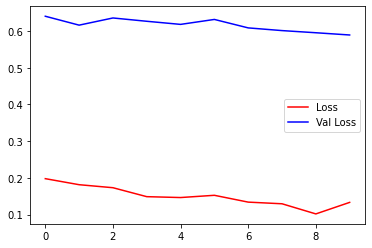

In [0]:
h = hist.history

# Visualizing loss
plt.plot(h['loss'],'r',label='Loss')
plt.plot(h['val_loss'],'b',label='Val Loss')
plt.legend()
plt.show()

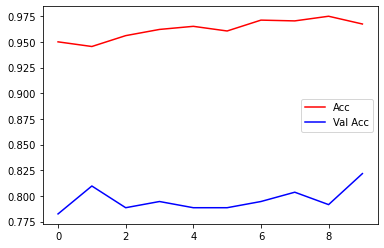

In [0]:
# Visualizing accuracy
plt.plot(h['accuracy'],'r',label='Acc')
plt.plot(h['val_accuracy'],'b',label='Val Acc')
plt.legend()
plt.show()

In [0]:
# Testing
test_image_data = []

test_path = os.path.join(folder_path,"test/images")
pokemon_images = os.listdir(test_path)

for img_name in pokemon_images:
  img_path = os.path.join(test_path,img_name)
  img = image.load_img(img_path,target_size=(224,224))
  img_data = image.img_to_array(img)

  test_image_data.append(img_data)

In [0]:
print(len(test_image_data))

187


In [0]:
XTest = np.array(test_image_data)
print(XTest.shape)

(187, 224, 224, 3)


In [0]:
YPred = model_new.predict(XTest)

In [0]:
print(YPred.shape)

(187, 10)


In [0]:
YPredMax = np.argmax(YPred,axis=1)

In [0]:
print(YPredMax.shape)
print(YPredMax[1])

(187,)
1


In [0]:
inv_label_dict = {
    0:"Aerodactyl",  
    1:"Bulbasaur",  
    2:"Charmander", 
    3:"Dratini",  
    4:"Fearow",  
    5:"Meowth",  
    6:"Pikachu",  
    7:"Psyduck",  
    8:"Spearow",  
    9:"Squirtle"
}

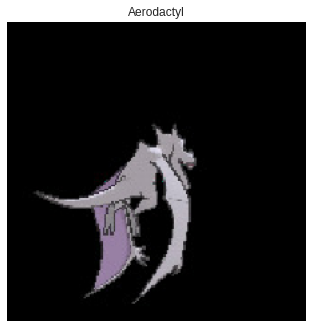

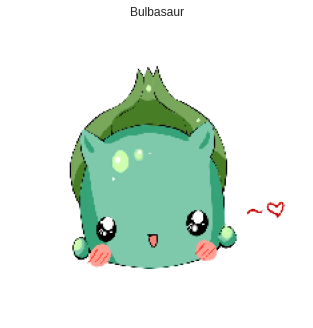

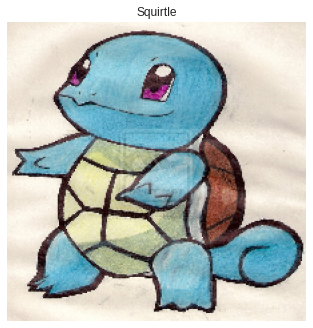

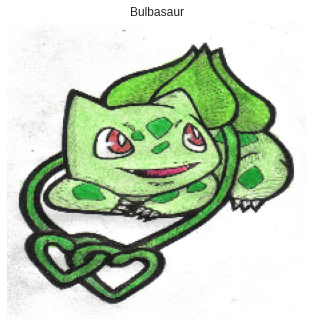

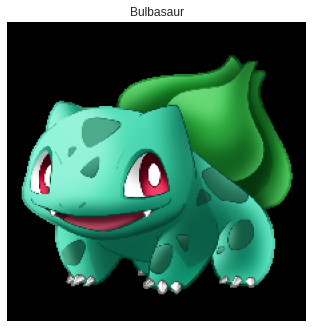

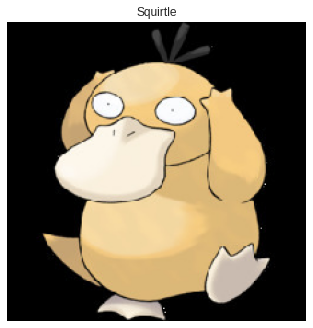

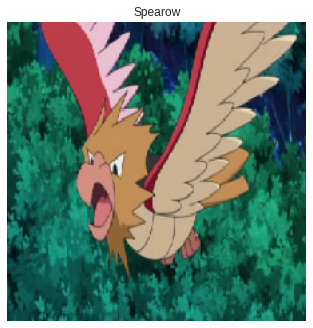

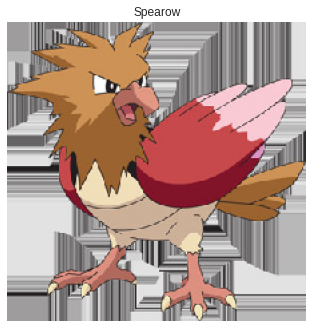

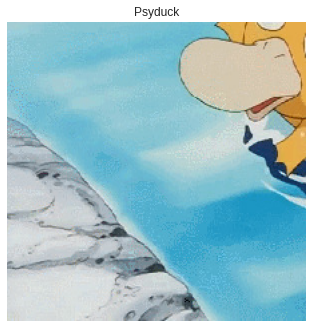

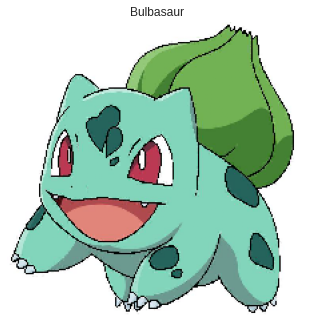

In [0]:
# Predictions
lim = 10
plt.style.use('seaborn')
for i in range(lim):
  img = XTest[i]
  plt.imshow(img/255.0)
  plt.title(inv_label_dict[YPredMax[i]])
  plt.axis('off')
  plt.show()